In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

## Load the training and test datasets

In [2]:
# Load the datasets
training_file = "wildfires_training.csv"
test_file = "wildfires_test.csv"

# Define features and target
independent_cols = ['year', 'temp', 'humidity', 'rainfall', 'drought_code', 'buildup_index', 'day', 'month', 'wind_speed']
dependent_cols = 'fire'  # Target column

df_training = pd.read_csv(training_file)
df_test = pd.read_csv(test_file)

# Inspect the training dataset
print(df_training.head())
print(df_training.shape)
print(df_test.head())
print(df_test.shape)

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    28        59       0.0          8.06           3.47    1   
1   no  2010    30        61       1.3          8.17           4.03    2   
2   no  2009    26        83      13.1          8.08           3.59    3   
3   no  2017    25        87       2.5          7.18           2.42    4   
4   no  2014    28        77       0.0         14.98           4.63    5   

   month  wind_speed  
0      6          19  
1      6          13  
2      6          22  
3      6          15  
4      6          18  
(154, 10)
  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    33        68       4.5          9.12           5.09   19   
1  yes  2009    28        56       0.0         38.17          21.21   12   
2   no  2017    30        64       0.6         15.38           6.24   24   
3   no  2007    23        74       8.3          7.36           2.27   14   
4   no  2017   

In [3]:
# Convert 'fire' column to binary values (1 for 'yes', 0 for 'no')
df_training[dependent_cols] = df_training[dependent_cols].map({'yes': 1, 'no': 0})

# Split the training data into features (X) and target (y)
X_training = df_training.loc[:,independent_cols]
y_training = df_training.loc[:,dependent_cols]

# Check the transformation
df_training.head()

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,0,2015,28,59,0.0,8.06,3.47,1,6,19
1,0,2010,30,61,1.3,8.17,4.03,2,6,13
2,0,2009,26,83,13.1,8.08,3.59,3,6,22
3,0,2017,25,87,2.5,7.18,2.42,4,6,15
4,0,2014,28,77,0.0,14.98,4.63,5,6,18


In [4]:
# Convert 'fire' column to binary values (1 for 'yes', 0 for 'no')
df_test[dependent_cols] = df_test[dependent_cols].map({'yes': 1, 'no': 0})

# Split the training data into features (X) and target (y)
X_test = df_test.loc[:,independent_cols]
y_test = df_test.loc[:,dependent_cols]

# Check the transformation
df_test.head()

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,0,2015,33,68,4.5,9.12,5.09,19,6,16
1,1,2009,28,56,0.0,38.17,21.21,12,6,18
2,0,2017,30,64,0.6,15.38,6.24,24,9,19
3,0,2007,23,74,8.3,7.36,2.27,14,9,28
4,0,2017,31,72,0.3,30.47,5.63,7,9,17


## Train the Decision Tree Model

In [24]:
dt = DecisionTreeClassifier()

# Fit the model on the training data
dt.fit(X_training, y_training)

DecisionTreeClassifier()

In [26]:
y_training_pred = dt.predict(X_training)
y_test_pred = dt.predict(X_test)

print("Classification Report (Training set):", classification_report(y_training, y_training_pred))
print("Accuracy of default parameters on training set: ", accuracy_score(y_training, y_training_pred))
print("\nClassification Report (Test set):", classification_report(y_test, y_test_pred))

print("\nAccuracy of default parameters on training set: ", accuracy_score(y_training, y_training_pred))
print("Accuracy of default parameters on test set: ", accuracy_score(y_test, y_test_pred))

Classification Report (Training set):               precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        79

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

Accuracy of default parameters on training set:  1.0

Classification Report (Test set):               precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1       0.92      0.82      0.87        28

    accuracy                           0.86        50
   macro avg       0.86      0.87      0.86        50
weighted avg       0.87      0.86      0.86        50


Accuracy of default parameters on training set:  1.0
Accuracy of default parameters on test set:  0.86


## Visualize the data 

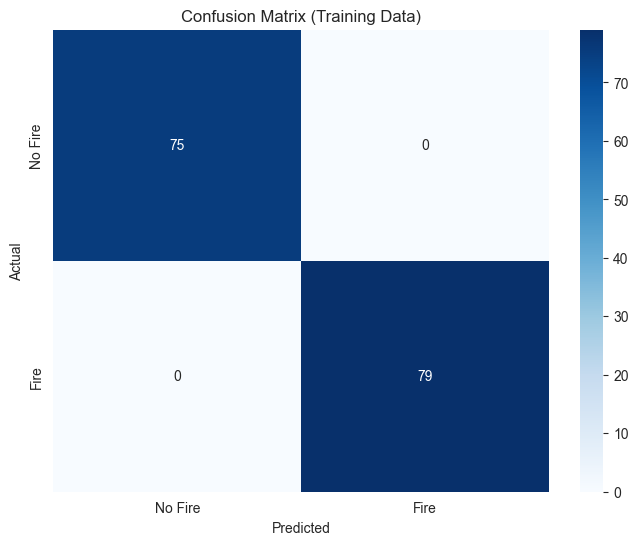

In [7]:
# Generate a confusion matrix
confusion_mtx = confusion_matrix(y_training, y_training_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.title('Confusion Matrix (Training Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

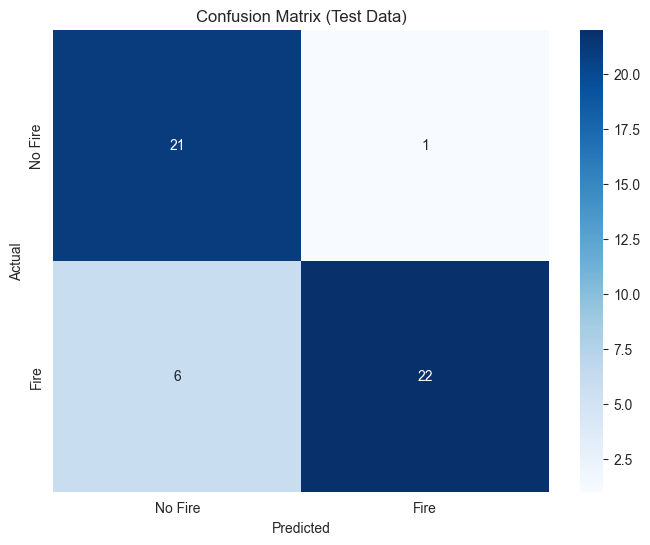

In [8]:
# Generate a confusion matrix
confusion_mtx = confusion_matrix(y_test, y_test_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.title('Confusion Matrix (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Find the best tuning parameters

In [12]:
# Define the hyperparameters to tune
max_depths = np.linspace(1, 32, 32, endpoint=True).astype(int)  # Convert to integers
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

best_accuracy = 0
best_params = []

# Loop through the hyperparameters
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        print("Evaluation of Decision Tree Classifier")
        
        # Initialize Decision Tree Classifier
        dt = DecisionTreeClassifier(max_depth=max_depth, 
                                     min_samples_split=int(min_samples_split * len(X_training)))  # Convert to int

        # Train the model
        dt.fit(X_training, y_training)
        
        # Predictions on the training and test sets
        y_train_pred = dt.predict(X_training)
        y_test_pred = dt.predict(X_test)
        
        # Compute accuracies
        training_accuracy = accuracy_score(y_training, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Print out the results with max_depth and min_samples_split values
        print(f"Max Depth: {max_depth} \nMin Samples Split: {int(min_samples_split * len(X_training))}")
        print(f"Training Accuracy: {training_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print("-" * 60)
        
        # Update the best parameters if test accuracy improves
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_params = [{'max_depth': max_depth, 'min_samples_split': int(min_samples_split * len(X_training))}]  # Start a new list
        elif test_accuracy == best_accuracy:
            best_params.append({'max_depth': max_depth, 'min_samples_split': int(min_samples_split * len(X_training))})  # Append to the existing list

# Output the best hyperparameter combinations
print("\nBest performing hyperparameters:")
for params in best_params:
    print(f"Max Depth={params['max_depth']}, Min Samples Split={params['min_samples_split']}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")

# Initialize and train the final model with the best parameters
final_model = DecisionTreeClassifier(max_depth=best_params[0]['max_depth'], 
                                      min_samples_split=best_params[0]['min_samples_split'])
final_model.fit(X_training, y_training)

# Predictions on the test set
y_test_pred = final_model.predict(X_test)

# Print the classification report and accuracy
print("\nClassification Report (training set after tuning):")
print(classification_report(y_training, y_training_pred))
print("Accuracy of tuned parameters on training set: ", accuracy_score(y_training, y_training_pred))

# Print the classification report and accuracy
print("\nClassification Report (Test set after tuning):")
print(classification_report(y_test, y_test_pred))
print("Accuracy of tuned parameters on test set: ", accuracy_score(y_test, y_test_pred))


Evaluation of Decision Tree Classifier
Max Depth: 1 
Min Samples Split: 15
Training Accuracy: 0.8831
Test Accuracy: 0.8000
------------------------------------------------------------
Evaluation of Decision Tree Classifier
Max Depth: 1 
Min Samples Split: 30
Training Accuracy: 0.8831
Test Accuracy: 0.8000
------------------------------------------------------------
Evaluation of Decision Tree Classifier
Max Depth: 1 
Min Samples Split: 46
Training Accuracy: 0.8831
Test Accuracy: 0.8000
------------------------------------------------------------
Evaluation of Decision Tree Classifier
Max Depth: 1 
Min Samples Split: 61
Training Accuracy: 0.8831
Test Accuracy: 0.8000
------------------------------------------------------------
Evaluation of Decision Tree Classifier
Max Depth: 1 
Min Samples Split: 77
Training Accuracy: 0.8831
Test Accuracy: 0.8000
------------------------------------------------------------
Evaluation of Decision Tree Classifier
Max Depth: 1 
Min Samples Split: 92
Train

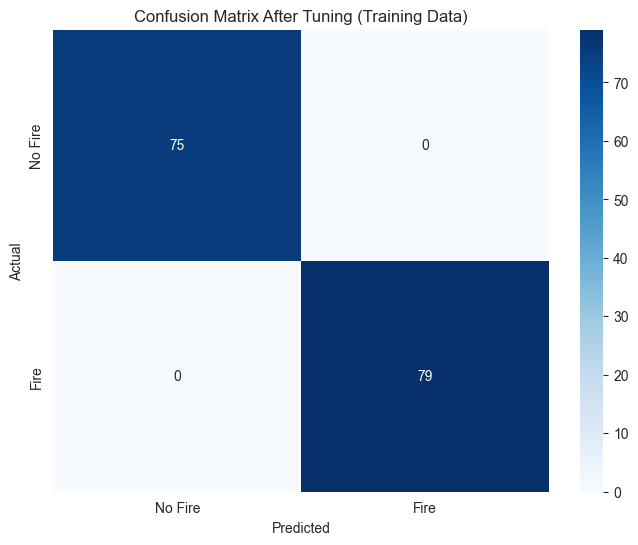

In [14]:
# Generate a confusion matrix
confusion_mtx = confusion_matrix(y_training, y_training_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.title('Confusion Matrix After Tuning (Training Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

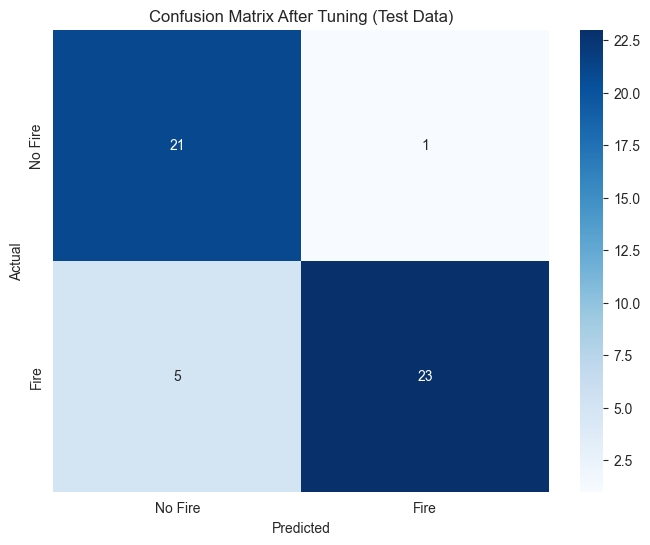

In [13]:
# Generate a confusion matrix
confusion_mtx = confusion_matrix(y_test, y_test_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.title('Confusion Matrix After Tuning (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

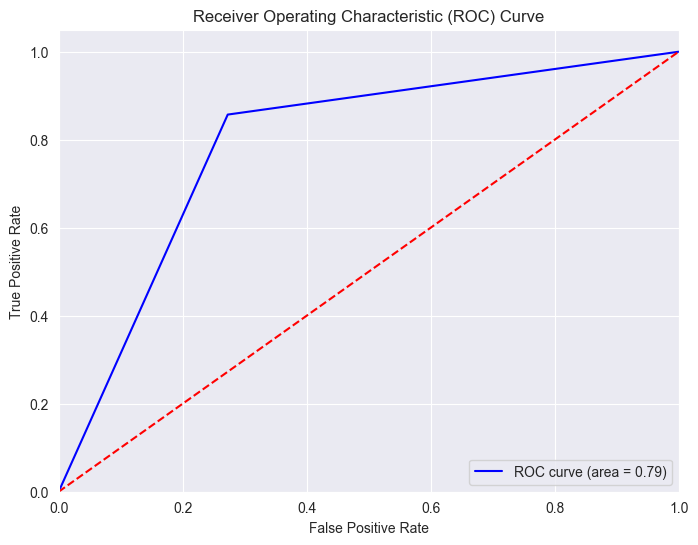

In [11]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()